#  WeRateDogs Twitter - The Data Wrangling Project

# Introduction


Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

*The goal of this project is to wrangle data from [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) Twitter's account using Python and document the whole process in a Jupyter Notebook  named wrangle_act.ipynb i.e. this notebook.*


# Project Details

The main tasks for this project were:

* Data wrangling, which consists of:
  * Gathering data
  * Assessing data
  * Cleaning data
* Storing, analyzing, and visualizing our wrangled data
* Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

## Gathering Data for this Project

### Enhanced Twitter Archive

The WeRateDogs Twitter archive provided by Udacity. This contains basic tweet data for all 5000+ of their tweets.I manually downloaded this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

### Image Predictions File

This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: [image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

### Additional Data via the Twitter API

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.


## Key Points

Key points to keep in mind when data wrangling for this project:

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

## Acceptance Criterion 

* Assessing Data for this Project
  * Detect and document at least eight (8) quality issues 
  * Two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.
  
* Cleaning Data for this Project
  * Clean each of the issues you documented while assessing. 
  * The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).
  
* Storing, Analyzing, and Visualizing Data for this Project
  * Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. 
  * If additional files exist because multiple tables are required for tidiness, name these files appropriately.
  * Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

* Analyze and visualize your wrangled data.
  * At least three (3) insights and
  * one (1) visualization must be produced

* Reporting for this Project
  * Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

  * Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

# Importing libraries

In [15]:
# first: install tweepy
conda install -c hargup/label/pypi tweepy

In [4]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

# Gather Data

## 1. Twitter Archived Data

In [5]:
# read csv as a Pandas DataFrame
df_twitter_archive = pd.read_csv('./resources/twitter-archive-enhanced.csv')
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2. Image Predictions Data

In [8]:
# downloading and saving data using Requests
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('./resources/image_predictions.tsv', 'wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('./resources/image_predictions.tsv', sep='\t')

In [9]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. Retweet Data | Query Twitter API

In [13]:
# downloading data using Twitter API: the auth codes
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [14]:
# using the tweepy library
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [15]:
# list of tweets from archive data set
df_tweet_ids = df_twitter_archive['tweet_id']

In [16]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# list of tweets
df_tweets = []

# start time of execution
start = time.time()

# for loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

# printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 566


758740312047005698 _ Failed to send request: ('Connection aborted.', OSError("(54, 'ECONNRESET')"))
754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 613


676957860086095872 _ Failed to send request: ('Connection aborted.', OSError("(54, 'ECONNRESET')"))
Total time taken for execution 1983.7789559364319


In [17]:
# total tweets received from api
print("The lengh of the result", len(df_tweets))

# the tweet_id of the errors received from api
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2329
The lengh of the errors 27


In [18]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [19]:
# read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [20]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36362,7740,8768045,145816,2017-08-01 16:23:56+00:00
1,892177421306343426,31326,5728,8768045,145816,2017-08-01 00:17:27+00:00
2,891815181378084864,23598,3790,8768045,145816,2017-07-31 00:18:03+00:00
3,891689557279858688,39667,7902,8768045,145816,2017-07-30 15:58:51+00:00
4,891327558926688256,37868,8524,8768045,145816,2017-07-29 16:00:24+00:00


In [21]:
df_api_data.tail()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2324,666049248165822465,96,41,8768063,145816,2015-11-16 00:24:50+00:00
2325,666044226329800704,273,132,8768063,145816,2015-11-16 00:04:52+00:00
2326,666033412701032449,112,41,8768063,145816,2015-11-15 23:21:54+00:00
2327,666029285002620928,121,42,8768063,145816,2015-11-15 23:05:30+00:00
2328,666020888022790149,2424,465,8768063,145816,2015-11-15 22:32:08+00:00


In [22]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2329 non-null   int64 
 1   favorites        2329 non-null   int64 
 2   retweets         2329 non-null   int64 
 3   user_followers   2329 non-null   int64 
 4   user_favourites  2329 non-null   int64 
 5   date_time        2329 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


### Finalized data gathering 

#### The three dataframes are:

* df_twitter_archive: contains data read from provided csv 
* df_image_predictions: contains data read (by using requests) from tsv file hosted on server
* df_api_data: contains data obtained from twitter handle by using tweepy library and creating a twitter app for oauth

## Assessing Data

## 1. Twitter Archive Data

In [23]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1694,681281657291280384,NaN,NaN,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sarge. His parents signed him up for danc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681281657...,11,10,Sarge,None,None,None,None
768,777621514455814149,NaN,NaN,2016-09-18 21:33:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. You can't look at him and not s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777621514...,12,10,Derek,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
1838,675898130735476737,NaN,NaN,2015-12-13 04:40:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm sure you've all seen this pupper. Not prep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675898130...,10,10,None,None,None,pupper,None


In [25]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
print(df_twitter_archive.doggo.value_counts())
print()
print(df_twitter_archive.floofer.value_counts())
print()
print(df_twitter_archive.pupper.value_counts())
print()
print(df_twitter_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [29]:
df_twitter_archive.retweeted_status_id.notnull().sum()

181

In [30]:
df_twitter_archive.in_reply_to_status_id.notnull().sum()

78

In [31]:
# section of retweets and replies
df_twitter_archive[185:190]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,279280991.0,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
187,856282028240666624,NaN,NaN,2017-04-23 23:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [32]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
df_twitter_archive[df_twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [34]:
df_twitter_archive[df_twitter_archive['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [35]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [36]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2. Image Predictions data

In [37]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False
2014,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
762,688898160958271489,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1,Ibizan_hound,0.853170,True,Chihuahua,0.039897,True,Italian_greyhound,0.035220,True
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,0.997121,False,seat_belt,0.000375,False,beagle,0.000216,True
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True
582,678798276842360832,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1,Airedale,0.583122,True,silky_terrier,0.129567,True,Lakeland_terrier,0.094727,True
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False
804,691675652215414786,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,Chihuahua,0.182898,True,teddy,0.128077,False,West_Highland_white_terrier,0.097875,True


In [39]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [40]:
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [41]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [42]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 3. Retweet / Twitter API Data

In [44]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2329 non-null   int64 
 1   favorites        2329 non-null   int64 
 2   retweets         2329 non-null   int64 
 3   user_followers   2329 non-null   int64 
 4   user_favourites  2329 non-null   int64 
 5   date_time        2329 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


In [45]:
df_api_data.sample(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1456,693280720173801472,3349,1235,8768054,145816,2016-01-30 03:52:58+00:00
2134,669564461267722241,375,119,8768062,145816,2015-11-25 17:13:02+00:00
819,766864461642756096,0,5720,8768047,145816,2016-08-20 05:08:29+00:00
1929,673612854080196609,1561,697,8768063,145816,2015-12-06 21:19:54+00:00
36,885167619883638784,20620,4008,8768045,145816,2017-07-12 16:03:00+00:00


In [46]:
df_api_data[df_api_data.duplicated(['user_favourites'], keep=False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36362,7740,8768045,145816,2017-08-01 16:23:56+00:00
1,892177421306343426,31326,5728,8768045,145816,2017-08-01 00:17:27+00:00
2,891815181378084864,23598,3790,8768045,145816,2017-07-31 00:18:03+00:00
3,891689557279858688,39667,7902,8768045,145816,2017-07-30 15:58:51+00:00
4,891327558926688256,37868,8524,8768045,145816,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2324,666049248165822465,96,41,8768063,145816,2015-11-16 00:24:50+00:00
2325,666044226329800704,273,132,8768063,145816,2015-11-16 00:04:52+00:00
2326,666033412701032449,112,41,8768063,145816,2015-11-15 23:21:54+00:00
2327,666029285002620928,121,42,8768063,145816,2015-11-15 23:05:30+00:00


In [47]:
df_api_data.user_favourites.describe()

count      2329.000000
mean     145816.014599
std           0.119965
min      145816.000000
25%      145816.000000
50%      145816.000000
75%      145816.000000
max      145817.000000
Name: user_favourites, dtype: float64

In [48]:
df_api_data.retweets.describe()

count     2329.000000
mean      2717.620867
std       4596.145004
min          1.000000
25%        548.000000
50%       1275.000000
75%       3161.000000
max      78209.000000
Name: retweets, dtype: float64

In [49]:
df_api_data.isnull().sum()

tweet_id           0
favorites          0
retweets           0
user_followers     0
user_favourites    0
date_time          0
dtype: int64

## Quality and tidiness issues

**df_twitter_enhanced dataframe**

- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
- In several columns null objects are non-null (None to NaN).
- The numerator and denominator columns have invalid values.
- Incorrect names or missing names in name column such as, a, an, the.
- Missing data in name and stages columns showing as 'None'.

**df_image_predictions dataframe**

- p1, p2 and p3 should be categorical datatype
- p1_conf, p2_conf and p3_conf columns should be merged 
- p1_dog, p2_dog and p3_dog columns should be merged


**df_api_data dataframe**

- user_favourites value is same for all rows, which seems incorrect
- datetime should be of datatime datatype instead of string


**Tidiness Issues or structural issues**

- df_image_predictions should only have jpg_url and tweet_id, no other information is required
- *df_twitter_archive* df should be joined to *df_image_predictions* and *df_api_data*

### Table of quality and tidiness issues:

|**Issue number**|**Description**|**Issue Type**| 
|---------------|---------------|--------------|
|I#1| Combine three different dataframes into one master data set| Tidiness|
|I#2| Clean sources columns| Quality| 
|I#3| Refine respective predictions and confidence columns| Quality|
|I#4| Combine and clean different dog stages (eg: pupper,doggo) columns into one| Quality|
|I#5| Clean text column to get dog gender| Quality|
|I#6| Remove unwanted columns (retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id ) and clean up duplicate rows and NaNs| Tidiness|
|I#7| Drop columns with one low values or similar kind of values|Quality|
|I#8| Fix numerator and denominators| Quality|
|I#9| Convert NaNs/Nulls to None | Quality|
|I#10| Fix datatypes of various columns| Quality|

## Cleaning
The above table "Table of quality and tidiness issues" will be used as a guideline and structure for this section.

### 1) Twitter archive data:

In [50]:
# copy dataframes
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_api_data_clean = df_api_data.copy()

#### Definition Issue #1:
Resolve the biggest structural issue. There should be one master table instead of three tables. Thus, I am merging the three dataframes into one. Hence, we have only one dataframe left to clean and process.

#### Code

In [51]:
# prep 1
df_twitter_archive_clean = pd.merge(left=df_twitter_archive_clean,
                                 right=df_api_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [52]:
# prep 2
df_twitter_archive_clean = df_twitter_archive_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [53]:
# check 1
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

In [54]:
# check 2
df_twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Definition Issue #2:
Clean the content of source column to make it more readable.

#### Code

In [55]:
# prep
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [56]:
# check
df_twitter_archive_clean['source'].value_counts()

Twitter for iPhone    2017
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

#### Definition Issue #3:
Refine p1, p2 and p3 columns and confidence associated by combining.

#### Code

In [57]:
# prep
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_twitter_archive_clean.apply(get_prediction_confidence, axis=1)
df_twitter_archive_clean['prediction'] = prediction
df_twitter_archive_clean['confidence'] = confidence

In [58]:
# drop the not required columns of image prediction information
df_twitter_archive_clean = df_twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#### Test

In [59]:
# check if 2 new columns have been added and not required columns have been dropped
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

#### Definition Issue #4:
Define new column for life stage of dog by melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage

#### Code

In [60]:
# prep
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_twitter_archive_clean.columns.tolist() if x not in melt_columns]

# melt the columns into values
df_twitter_archive_clean = pd.melt(df_twitter_archive_clean, id_vars = stay_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'life_stage')

In [61]:
# delete column 'stages'
df_twitter_archive_clean = df_twitter_archive_clean.drop('stages', 1)

#### Test

In [62]:
# check if doggo', 'floofer', 'pupper', 'puppo' have been dropped and new column 'life_stage' has been added.
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8228 non-null   int64  
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   8228 non-null   object 
 4   source                      8228 non-null   object 
 5   text                        8228 non-null   object 
 6   retweeted_status_id         288 non-null    float64
 7   retweeted_status_user_id    288 non-null    float64
 8   retweeted_status_timestamp  288 non-null    object 
 9   expanded_urls               8228 non-null   object 
 10  rating_numerator            8228 non-null   int64  
 11  rating_denominator          8228 non-null   int64  
 12  name                        8228 non-null   object 
 13  favorites                   8228 

In [63]:
# check all types in life_stage column
df_twitter_archive_clean.life_stage.value_counts()

None       7897
pupper      221
doggo        78
puppo        24
floofer       8
Name: life_stage, dtype: int64

#### Definition Issue #5:
Get the correct dog gender from text column by filtering common phrases and assigning a gender. Using 'NaN' if no gender can be inferred from text.

#### Code

In [64]:
# prep - loop on all the texts and check if it has one of pronouns of male or female; add that to list.

male_pronouns = ['He', 'he', 'him', 'his', "he's", 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_twitter_archive_clean['text']:
    # Male
    if any(map(lambda v:v in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

# add a new column for dog gender
df_twitter_archive_clean['dog_gender'] = gender

#### Test

In [65]:
# check the values in new column dog_gender
df_twitter_archive_clean.dog_gender.value_counts()

NaN       4684
male      2592
female     952
Name: dog_gender, dtype: int64

#### Definition Issue #6:
Clean data by dropping duplicates row and not meaningful columns.

#### Code

In [66]:
# prep
# delete the retweets
df_twitter_archive_clean = df_twitter_archive_clean[pd.isnull(df_twitter_archive_clean.retweeted_status_id)]

# delete columns we don't need anymore
df_twitter_archive_clean = df_twitter_archive_clean.drop('retweeted_status_id', 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('retweeted_status_user_id', 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('retweeted_status_timestamp', 1)

#imported from the API but has same values as timestamp column
df_twitter_archive_clean = df_twitter_archive_clean.drop('date_time', 1)

# delete duplicated tweet_id
df_twitter_archive_clean = df_twitter_archive_clean.drop_duplicates()

# delete tweets with no pictures
df_twitter_archive_clean = df_twitter_archive_clean.dropna(subset = ['jpg_url'])

# delete dog_stage duplicates
df_twitter_archive_clean = df_twitter_archive_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')

#### Test

In [67]:
# check the number of records after cleaning 
print("Number of records", len(df_twitter_archive_clean))
df_twitter_archive_clean.info()
df_twitter_archive_clean.sample(5)

Number of records 1985
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7046
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1985 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1985 non-null   object 
 4   source                 1985 non-null   object 
 5   text                   1985 non-null   object 
 6   expanded_urls          1985 non-null   object 
 7   rating_numerator       1985 non-null   int64  
 8   rating_denominator     1985 non-null   int64  
 9   name                   1985 non-null   object 
 10  favorites              1985 non-null   int64  
 11  retweets               1985 non-null   int64  
 12  user_followers         1985 non-null   int64  
 13  user_favourites        1985 non-null   int64  
 14  jpg_url                1985 non-n

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,prediction,confidence,life_stage,dog_gender
543,787810552592695296,NaN,NaN,2016-10-17 00:20:47 +0000,Twitter for iPhone,This is Frank. He wears sunglasses and walks h...,https://twitter.com/dog_rates/status/787810552...,11,10,Frank,8840,3136,8768045,145816,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,pug,0.362835,None,male
463,799757965289017345,NaN,NaN,2016-11-18 23:35:32 +0000,Twitter for iPhone,This is Sobe. She's a h*ckin happy doggo. Only...,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,8611,2219,8768045,145816,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,Border_collie,0.442534,doggo,NaN
369,816336735214911488,NaN,NaN,2017-01-03 17:33:39 +0000,Twitter for iPhone,This is Dudley. He found a flower and now he's...,https://twitter.com/dog_rates/status/816336735...,11,10,Dudley,8782,1990,8768045,145816,https://pbs.twimg.com/media/C1Q17WdWEAAjKFO.jpg,Labrador_retriever,0.919330,None,male
1882,669015743032369152,NaN,NaN,2015-11-24 04:52:37 +0000,Twitter for iPhone,Super rare dog right here guys. Doesn't bark. ...,https://twitter.com/dog_rates/status/669015743...,10,10,None,721,360,8768062,145816,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,NaN,0.000000,None,NaN
382,813910438903693312,NaN,NaN,2016-12-28 00:52:25 +0000,Twitter for iPhone,This is Chubbs. He dug a hole and now he's stu...,https://twitter.com/dog_rates/status/813910438...,11,10,Chubbs,9503,1915,8768045,145816,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,Siberian_husky,0.699355,doggo,male


In [68]:
df_twitter_archive_clean.life_stage.value_counts()

None       1680
pupper      212
doggo        62
puppo        23
floofer       8
Name: life_stage, dtype: int64

#### Definition Issue #7:
Drop columns with one low values or similar kind of values.
   - One value in in_reply_to_user_id so we will delete the columns of reply all of them replying to @dog_rates.
   - user_favourites has 2 values and they are close.

#### Code

In [69]:
# prep - deep-dive: concentration on low values
print('in_reply_to_user_id ')
print(df_twitter_archive_clean['in_reply_to_user_id'].value_counts())
print('user_favourites ')
print(df_twitter_archive_clean['user_favourites'].value_counts())

in_reply_to_user_id 
4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64
user_favourites 
145816    1956
145817      29
Name: user_favourites, dtype: int64


In [70]:
# drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

#### Test

In [71]:
# check if the above columns have been deleted.
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7046
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1985 non-null   int64  
 1   timestamp           1985 non-null   object 
 2   source              1985 non-null   object 
 3   text                1985 non-null   object 
 4   expanded_urls       1985 non-null   object 
 5   rating_numerator    1985 non-null   int64  
 6   rating_denominator  1985 non-null   int64  
 7   name                1985 non-null   object 
 8   favorites           1985 non-null   int64  
 9   retweets            1985 non-null   int64  
 10  user_followers      1985 non-null   int64  
 11  jpg_url             1985 non-null   object 
 12  prediction          1985 non-null   object 
 13  confidence          1985 non-null   float64
 14  life_stage          1985 non-null   object 
 15  dog_gender          1985 non-null   object 
dtypes: flo

#### Definition Issue #8:
Fix rating numerator and denominators that are not actually ratings. Also clean the numerators with decimals.

#### Code

In [72]:
# prep - view all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1391    This is Darrel. He just robbed a 7/11 and is i...
1611    Two gorgeous dogs here. Little waddling dog is...
1512    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1545    These two pups just met and have instantly bon...
1215    This may be the greatest video I've ever been ...
1125    This is Socks. That water pup w the super legs...
1255    When bae says they can't go out but you see th...
1281    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1270    This is Eriq. His friend just reminded him of ...
1965    This is Kial. Kial is either wearing a cape, w...
1974    Two dogs in this one. Both are rare Jujitsu Py...
1881    Here we have Pancho and Peaches. Pancho is a C...
1918    This is Spark. He's nervous. Other dog hasn't ...
2007    These are Peruvian Feldspars. Their names are ...
2036    This is an Albanian 3 1/2 legged  Episcopalian...
1716    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1818    Meet Hank and Sully. Hank is very proud of the...
1769    Meet H

In [73]:
for entry in text_ratings_to_fix:
    mask = df_twitter_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_twitter_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_twitter_archive_clean.loc[mask, column_name2] = 10

In [74]:
df_twitter_archive_clean[df_twitter_archive_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1391,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,36889,16582,8768054,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,Chihuahua,0.155207,None,male
1611,674646392044941312,2015-12-09 17:46:48 +0000,Twitter for iPhone,Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,8,10,None,1402,479,8768063,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,flat-coated_retriever,0.837448,None,NaN
1512,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,1628,524,8768053,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,Blenheim_spaniel,0.924127,None,NaN
1545,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,2244,1012,8768063,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,Chihuahua,0.376741,None,NaN
1215,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,1606,591,8768054,https://pbs.twimg.com/ext_tw_video_thumb/69506...,NaN,0.000000,None,NaN
1125,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,1919,383,8768053,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,None,NaN
1255,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,2400,564,8768054,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,None,NaN
1281,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,2170,742,8768054,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,collie,0.600186,None,NaN
1270,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,1893,453,8768054,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,Pembroke,0.426459,None,male
1965,667544320556335104,2015-11-20 03:25:43 +0000,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,4,10,Kial,830,501,8768062,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893,None,NaN


In [75]:
# view tweets with decimals in rating in 'text' column
df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1437,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1716,482,8768054,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,None,NaN
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,43148,9052,8768045,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,None,female
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,18682,6262,8768698,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,None,male
4717,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,6671,1649,8768045,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper,NaN


In [76]:
# set correct numerators for specific tweets
df_twitter_archive_clean.loc[(df_twitter_archive_clean['tweet_id'] == 883482846933004288) & (df_twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_twitter_archive_clean.loc[(df_twitter_archive_clean['tweet_id'] == 786709082849828864) & (df_twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_twitter_archive_clean.loc[(df_twitter_archive_clean['tweet_id'] == 778027034220126208) & (df_twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_twitter_archive_clean.loc[(df_twitter_archive_clean['tweet_id'] == 680494726643068929) & (df_twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### Test

In [77]:
# check
df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1437,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,1716,482,8768054,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,None,NaN
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,43148,9052,8768045,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,None,female
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,18682,6262,8768698,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,None,male
4717,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,6671,1649,8768045,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper,NaN


#### Definition Issue #9:
Convert 'NaN' values to 'None' type

#### Code

In [78]:
# prep
df_twitter_archive_clean.loc[df_twitter_archive_clean['prediction'] == 'NaN', 'prediction'] = None
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
df_twitter_archive_clean.loc[df_twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

#### Test

In [79]:
# check
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7046
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1985 non-null   int64  
 1   timestamp           1985 non-null   object 
 2   source              1985 non-null   object 
 3   text                1985 non-null   object 
 4   expanded_urls       1985 non-null   object 
 5   rating_numerator    1985 non-null   object 
 6   rating_denominator  1985 non-null   int64  
 7   name                1985 non-null   object 
 8   favorites           1985 non-null   int64  
 9   retweets            1985 non-null   int64  
 10  user_followers      1985 non-null   int64  
 11  jpg_url             1985 non-null   object 
 12  prediction          1677 non-null   object 
 13  confidence          1985 non-null   float64
 14  life_stage          1985 non-null   object 
 15  dog_gender          856 non-null    object 
dtypes: flo

#### Definition Issue #10:
Correct all datatypes by changing the datatypes of the columns

#### Code

In [80]:
# prep
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(str)
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean.timestamp)
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].astype('category')
df_twitter_archive_clean['favorites'] = df_twitter_archive_clean['favorites'].astype(int)
df_twitter_archive_clean['retweets'] = df_twitter_archive_clean['retweets'].astype(int)
df_twitter_archive_clean['user_followers'] = df_twitter_archive_clean['user_followers'].astype(int)
df_twitter_archive_clean['life_stage'] = df_twitter_archive_clean['life_stage'].astype('category')
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype(float)
df_twitter_archive_clean['rating_denominator'] = df_twitter_archive_clean['rating_denominator'].astype(float)
df_twitter_archive_clean['dog_gender'] = df_twitter_archive_clean['dog_gender'].astype('category')

#### Test

In [81]:
# check data types of each column
df_twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
favorites                           int64
retweets                            int64
user_followers                      int64
jpg_url                            object
prediction                         object
confidence                        float64
life_stage                       category
dog_gender                       category
dtype: object

## Store cleaned data into one file

In [82]:
# save clean DataFrame to csv file
df_twitter_archive_clean.drop(df_twitter_archive_clean.columns[df_twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
df_twitter_archive_clean.to_csv('./resources/twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [83]:
df_twitter_archive_clean = pd.read_csv('./resources/twitter_archive_master.csv')
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1985 non-null   int64  
 1   timestamp           1985 non-null   object 
 2   source              1985 non-null   object 
 3   text                1985 non-null   object 
 4   expanded_urls       1985 non-null   object 
 5   rating_numerator    1985 non-null   float64
 6   rating_denominator  1985 non-null   float64
 7   name                1985 non-null   object 
 8   favorites           1985 non-null   int64  
 9   retweets            1985 non-null   int64  
 10  user_followers      1985 non-null   int64  
 11  jpg_url             1985 non-null   object 
 12  prediction          1677 non-null   object 
 13  confidence          1985 non-null   float64
 14  life_stage          1985 non-null   object 
 15  dog_gender          856 non-null    object 
dtypes: flo

# Visualization

In [84]:
# check
df_twitter_archive_clean
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(object)
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean.timestamp)
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].astype('category')
df_twitter_archive_clean['life_stage'] = df_twitter_archive_clean['life_stage'].astype('category')
df_twitter_archive_clean['dog_gender'] = df_twitter_archive_clean['dog_gender'].astype('category')

df_twitter_archive_clean.set_index('timestamp', inplace=True)
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1985 entries, 2017-08-01 16:23:56+00:00 to 2016-06-03 01:07:16+00:00
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1985 non-null   object  
 1   source              1985 non-null   category
 2   text                1985 non-null   object  
 3   expanded_urls       1985 non-null   object  
 4   rating_numerator    1985 non-null   float64 
 5   rating_denominator  1985 non-null   float64 
 6   name                1985 non-null   object  
 7   favorites           1985 non-null   int64   
 8   retweets            1985 non-null   int64   
 9   user_followers      1985 non-null   int64   
 10  jpg_url             1985 non-null   object  
 11  prediction          1677 non-null   object  
 12  confidence          1985 non-null   float64 
 13  life_stage          1985 non-null   category
 14  dog_gender          856 non-null    cate

#### Vizz #1:
Most common/popular dog category by retweets - V1

In [85]:
df_twitter_archive_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
timestamp,,,,,,,,,,,,,,,
2017-08-01 16:23:56+00:00,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,36362,7740,8768045,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,None,NaN
2015-12-24 04:11:37+00:00,679877062409191424,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,1987,645,8768054,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,NaN,0.000000,None,NaN
2015-12-24 17:00:27+00:00,680070545539371008,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2579,867,8768054,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,Shih-Tzu,0.121811,None,NaN
2015-12-24 18:00:19+00:00,680085611152338944,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,12793,8969,8768054,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,NaN,0.000000,None,NaN
2015-12-24 20:00:22+00:00,680115823365742593,Twitter for iPhone,This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9.0,10.0,Ozzy,2722,903,8768054,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,pug,0.999365,None,male


In [86]:
df_twitter_archive_clean.life_stage.value_counts()

None       1680
pupper      212
doggo        62
puppo        23
floofer       8
Name: life_stage, dtype: int64

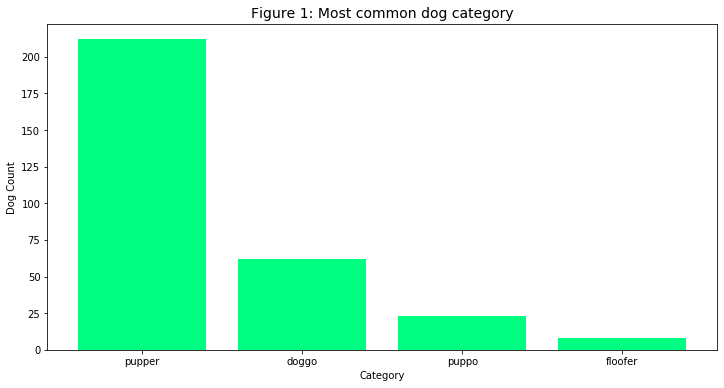

In [87]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [212, 62, 23, 8]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8, color = '#00FF80')
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Figure 1: Most common dog category", fontsize = '14')
plt.show()

- The most popular dog type is a "pupper"

#### Vizz #2:
Share by most popular dog category by retweets - V2

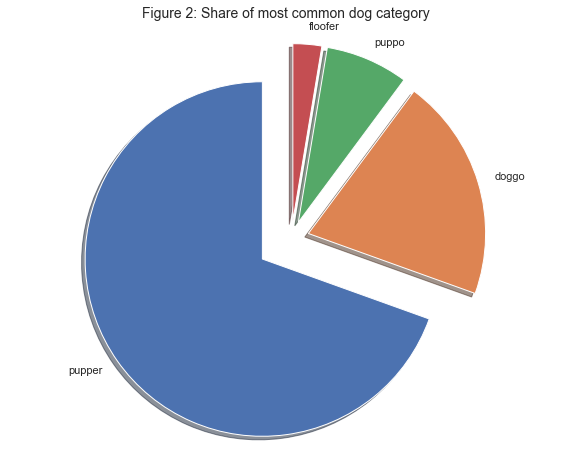

In [95]:
life_stage_count = list(df_twitter_archive_clean[df_twitter_archive_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_archive_clean[df_twitter_archive_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')
plt.title("Figure 2: Share of most common dog category", fontsize = '14')
plt.show()

- Dogs in Pupper stage of dog life cycle get most tweets = expected.

#### Vizz #3:
Correlation heat map

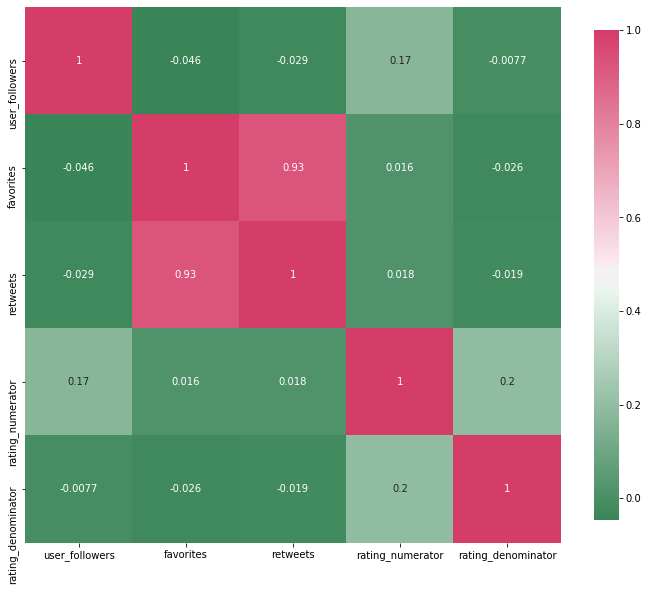

In [90]:
# set up a correlation map
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12,10))
    cmap = sns.diverging_palette(500,0,as_cmap = True)
    _ = sns.heatmap(corr,cmap = cmap,square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True)
    annot_kws = {'fontsize': '12'}
    
plot_correlation_map(df_twitter_archive_clean[['user_followers', 'favorites', 'retweets', 'rating_numerator', 'rating_denominator']])

- Strong correlation between favorites and retweets = expected. 
- Negative correlation between user followers and retweets = not expected. 

#### Vizz #4:
Scatter plot between favorites and retweets

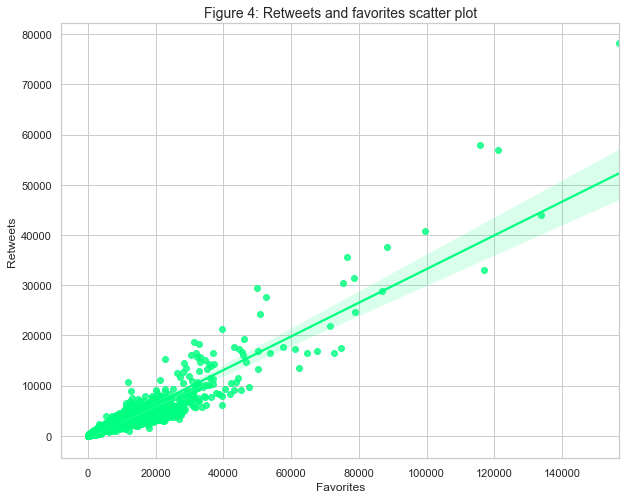

In [96]:
# favorites in relation to retweets, scatterplot
ax = sns.regplot(x = df_twitter_archive_clean['favorites'], y = df_twitter_archive_clean['retweets'], color = '#00FF80')

# formatting
ax.set_title('Figure 4: Retweets and favorites scatter plot', fontsize = '14')
ax.set_xlabel('Favorites', fontsize = '12')
ax.set_ylabel('Retweets', fontsize = '12')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('whitegrid')

As expected there is a strong positive (+0.9; shown by correlation heat map) relationship between the retweets and favorites

In [92]:
# calculating the rate for each retweet how many favorite will produce on average.
fav_ret_rate = df_twitter_archive_clean.favorites/df_twitter_archive_clean.retweets

# calculating of mean, standard deviation, etc.
fav_ret_rate[np.logical_not(df_twitter_archive_clean.favorites.isnull())].describe()

count    1985.000000
mean        3.505513
std         1.225964
min         1.122285
25%         2.650000
50%         3.310811
75%         4.105263
max        12.636550
dtype: float64

Seems there is a very positive correlation when the number of favourites raises the numbers of retweets also raise. Using a straightforward analysis for each new retweet the favourites will increase 3.5 (on average).

#### Vizz #5:
Which one is more adorable: Doggo, Puppo, Pupper or Floofer?

In [93]:
# Copying the original data, filling NaN values with None and calc: mean, rate, count
df_life_stage = df_twitter_archive_clean.copy()
df_life_stage.life_stage = df_life_stage.life_stage.fillna('None')
df_dog_mean = df_life_stage.groupby(['life_stage'])['favorites','retweets'].mean()
df_dog_mean = df_dog_mean.join(pd.DataFrame(df_dog_mean.favorites/df_dog_mean.retweets, columns = ['rate']))
df_dog_mean_count = df_dog_mean.join(df_life_stage.life_stage.value_counts())

# copy, edit, assign name, print
col_names = df_dog_mean_count.columns.tolist()
col_names[3] = 'count'
df_dog_mean_count.columns = col_names
df_dog_mean_count

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,favorites,retweets,rate,count
life_stage,,,,
None,7885.617262,2293.066071,3.438897,1680
doggo,18967.516129,6564.258065,2.889514,62
floofer,12588.875000,4211.625000,2.989078,8
pupper,6950.801887,2171.740566,3.200567,212
puppo,22060.173913,6355.913043,3.470811,23


Based on the summary above, in average, dogs without a classification tend to perform better rates of favourite per retweet. But keep in mind the few observations of floofer and puppo.

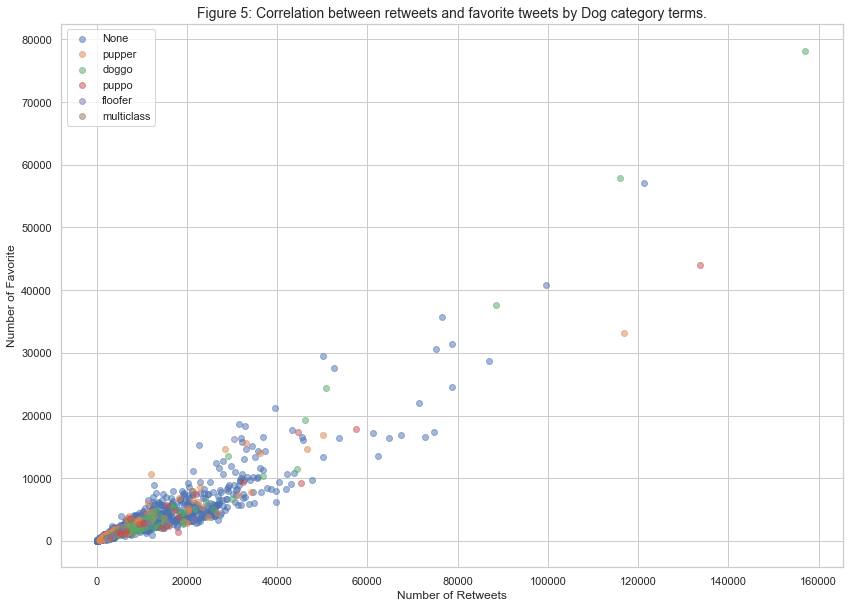

In [94]:
# copying the original data frame, fill NaN values, list terms
df_twitter_archive_clean = df_twitter_archive_clean.copy()
df_twitter_archive_clean.life_stage = df_twitter_archive_clean.life_stage.fillna('None')
dog_terms = ['None', 'pupper', 'doggo', 'puppo', 'floofer', 'multiclass'] # The order is ascending.

# formatting, graphic layers, plotting, axis
plt.figure(figsize = [14, 10])                               
for index in dog_terms:
    prov = df_twitter_archive_clean[df_twitter_archive_clean['life_stage'] == index][['favorites','retweets']]
    plt.scatter(x = prov['favorites'],  
                y = prov['retweets'] , 
                alpha = .5)       
plt.xlabel('Number of Retweets',    
           fontsize = '12')          
plt.ylabel('Number of Favorite',    
           fontsize = '12')          
plt.title('Figure 5: Correlation between retweets and favorite tweets by Dog category terms.',
          fontsize = '14')     
plt.legend(dog_terms)                
plt.show()                           

It is not possible to identify (visually) any pattern or relationship, using the life_stage variable, although there is a strong and positive correlation between Retweets and Favorites.

# Resources


* https://stackoverflow.com/questions/45123924/convert-pandas-dataframe-from-wide-to-long
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html
* https://aviaryan.in/blog/gsoc/downloading-files-from-urls.html
* https://stackoverflow.com/questions/44699682/how-to-save-a-file-downloaded-from-requests-to-another-directory
* https://wiki.python.org/moin/HandlingExceptions
* http://pbpython.com/pandas-list-dict.html
* http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
* https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
* https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-data-frame
* https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
* https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
* https://stackoverflow.com/questions/40319743/plotting-a-bar-graph-in-python-with-matplotlib-pyplot
* https://pythonspot.com/matplotlib-bar-chart/
* https://stackoverflow.com/questions/46799662/missing-data-in-pandas-merge
* https://stackoverflow.com/questions/46754398/pandas-merge-returns-nan
* https://pandas.pydata.org/pandas-docs/stable/merging.html
* https://www.youtube.com/watch?v=9uPTA9racZ0
* https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
* https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects-in-python/12451465#12451465
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
* Udacity Video and Link Material

# End of Notebook